In [ ]:
import numpy as np

# https://youtu.be/e2sM7ccaA9c
"""
Using....
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
"""

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from google.colab import files
uploaded = files.upload()
df= pd.read_csv('breast_cancer.csv')

Saving breast_cancer.csv to breast_cancer.csv


In [ ]:
#print(df.describe().T)  #Values need to be normalized before fitting. 
#print(df.isnull().sum())
df = df.dropna()

#Rename Dataset to Label to make it easy to understand
#df = df.rename(columns={'diagnosis':'label'})
#print(df.dtypes)

#Understand the data 
#sns.countplot(x="Label", data=df) #M - malignant   B - benign


####### Replace categorical values with numbers########
df['diagnosis'].value_counts()

#Define the dependent variable that needs to be predicted (labels)
y = df["diagnosis"].values
print(y.shape)


(569,)


In [ ]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # M=1 and B=0
#################################################################
#Define x and normalize values

#Define the independent variables. Let's also drop Gender, so we can normalize other data
X = df.drop(labels = ["diagnosis", "id"], axis=1) 


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X.shape)
#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

(569, 30)


In [ ]:
#Creating a Multilayer Perceptron Model to use to traing our dataset

model = Sequential()
model.add(Dense(16, input_dim=30, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(1)) 
model.add(Activation('sigmoid'))  
model.compile(loss='binary_crossentropy',
              optimizer='adam',             #also try adam
              metrics=['accuracy'])
print(model.summary())

###########################################################

# Fit the model to our dataset
import datetime
start = datetime.datetime.now()
history = model.fit(X_train, y_train ,verbose=1, epochs=100, batch_size=64,
                     validation_data=(X_test, y_test))

end = datetime.datetime.now()

print("Total execution time is: ", end-start)

_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                496       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
 activation_2 (Activation)   (None, 1)                 0         
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
7/7 [==============================] - 1s 24ms/step - loss: 0.4160 - accuracy: 0.8427 - val_loss: 0.3737 - val_accuracy: 0.9161
Epoch 2/100
7/7 [==========================

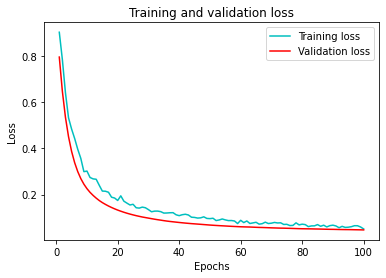

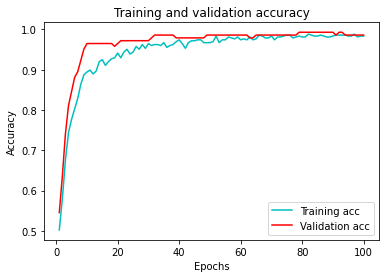

(143,)


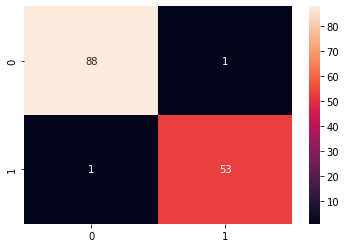

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'c', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'c', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Predict the label for X_test data
y_pred = model.predict(X_test)
print(y_test.shape)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)



